### Confidence Intervals for the ERP (Method 1) <a id="cis-m1"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.io import loadmat       # Import function to read data.
data = loadmat('EEG-1.mat')
EEGa = data['EEGa']
EEGb = data['EEGb']
t = data['t'][0]
ntrials = EEGa.shape[0]
nsamples = EEGa.shape[1]

In [3]:
mn = EEGa.mean(0)  # Compute the mean across trials (the ERP)

In [4]:
sd = EEGa.std(0)  # Compute the std across trials

In [6]:
sdmn = sd / np.sqrt(ntrials)  # Compute the std of the mean

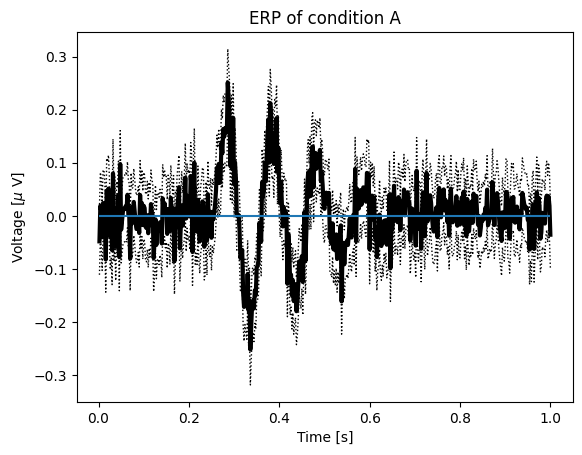

In [7]:
plt.plot(t, mn, 'k', lw=3)              # Plot the ERP of condition A
plt.plot(t, mn + 2 * sdmn, 'k:', lw=1)  # ... and include the upper CI
plt.plot(t, mn - 2 * sdmn, 'k:', lw=1)  # ... and the lower CI
plt.xlabel('Time [s]')                     # Label the axes
plt.ylabel('Voltage [$\mu$ V]')
plt.title('ERP of condition A')            # ... provide a useful title
plt.hlines(0, t[0], t[-1]);

### Confidence Intervals for the ERP (Method 2)

This is challenge 1

In [14]:
# Example: Draw 1000 integers with replacement from [0, 1000)
# np.random.seed(0) #get the same random numbers every time
i = np.random.randint(0, ntrials, size=ntrials) #what does random.randint do
print(i)

[437 772 192 891 154 468 389 378 856 273 964 312 160 241 337 584  73 740
 415 350 329 364 176 739 416 270 573 343 416 312 412 171  97 178 814 108
 840 421 632   2 785 143 707 341 496 754  93 869 120 662 210 519 823 177
  26 760 644 109  89  26 700 243 623 595 590 658 121 608 347 804 358 404
 383 492 387 658 205  51 561 543 481 658 268 623 987 231 866 839 606 813
 720  65  88 272 301 383 219 165 434 408 944 204   4 947 174  40 910 241
 394 411 334 870 397 516 726 271  29 974 170 665 203 479 219 534 110 811
 468 695 765 130 665 637 120 640 351 184 110 710 978 598 190 767 558 763
  89 717 652 318 293 979 159 887 924 315 504 339 808 360 377 601 797 796
  52 298 650 724 273 640 679  38 482 193 560 214  45 122 689 534 231 510
 348 321 341 834 544 434 326 614 931 484 151 122  82 102  89 750  79 113
 155 853 513 265 115 849 395  64 247 835 505 189  54 292 468 126  19 709
 724 637 702 196 169 208 656 185 645  96 278 131 392 830 860 169 842 102
 604  95 108 907 930  91 817 583 423 870 887  58   

In [15]:
EEG0 = EEGa[i,:]        # Create a resampled EEG.
                        # Q: What is the shape of the resampled EEG?
print(EEG0.shape)
print(EEGa.shape)

(1000, 500)
(1000, 500)


In [16]:
ERP0 = EEG0.mean(0)     # Create the resampled ERP AVERAGE ACROSS ROWS (0 = rows)
                        # Q: What is the difference between the resampled EEG and resampled ERP?
                        # Q: What does the resampled ERP look like?

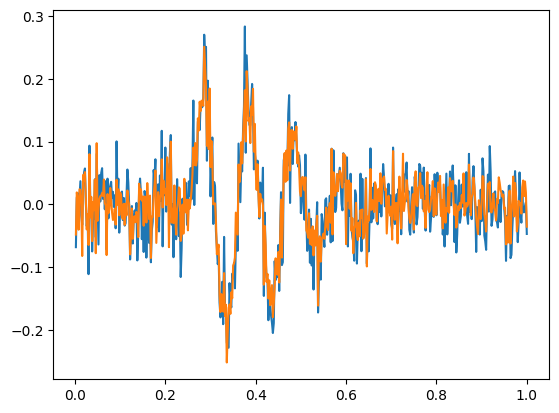

In [18]:
plt.plot(t,ERP0) #resampled dataset in blue
plt.plot(t,mn) #original dataset

In [28]:
N_resample = 3000
ERP0 = np.zeros((N_resample, nsamples))
for k in np.arange(0,N_resample):
    i = np.random.randint(0, ntrials, size=ntrials)  # Create resampled indices.
    EEG0 = EEGa[i,:]   # Create a resampled EEG. : means everything, all columns
    ERP0[k,:] = EEG0.mean(0)  # Create the resampled ERP (and fill in all columsn for the kth row)

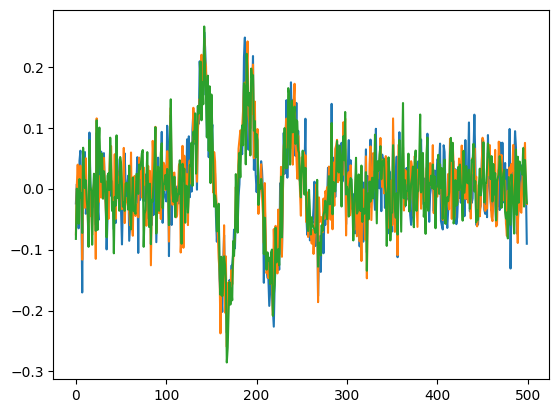

In [29]:
# Plot some examples.
plt.plot(ERP0[0,:]);
plt.plot(ERP0[1,:]);
plt.plot(ERP0[2,:]);

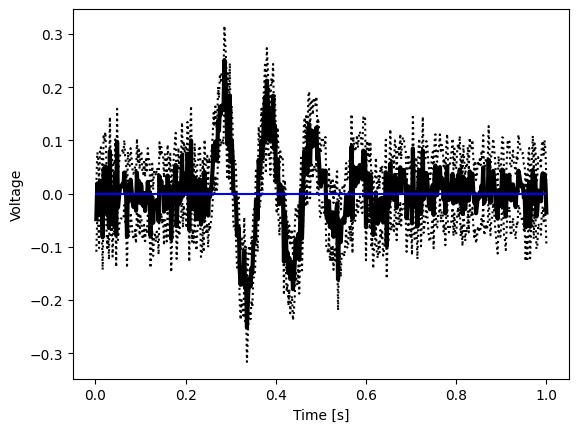

In [30]:
# Compute 95% CI from our 3000 resampled ERPs
ERP0_sorted = np.sort(ERP0,0)             # Sort each column of the resampled ERP
ciL = ERP0_sorted[75,:]                    # Determine the lower CI
ciU = ERP0_sorted[-75,:]                    # ... and the upper CI
mnA = EEGa.mean(0)                               # Determine the ERP for condition A
plt.plot(t, mnA, 'k', lw=3)               # ... and plot it
plt.plot(t, ciL, 'k:')                    # ... and plot the lower CI
plt.plot(t, ciU, 'k:')                    # ... and the upper CI
plt.hlines(0, 0, 1, 'b')                  # plot a horizontal line at 0
plt.xlabel('Time [s]')                    # ... and label the axes
plt.ylabel('Voltage');

### Comparing ERPs <a class="anchor" id="comparing-erps"></a>

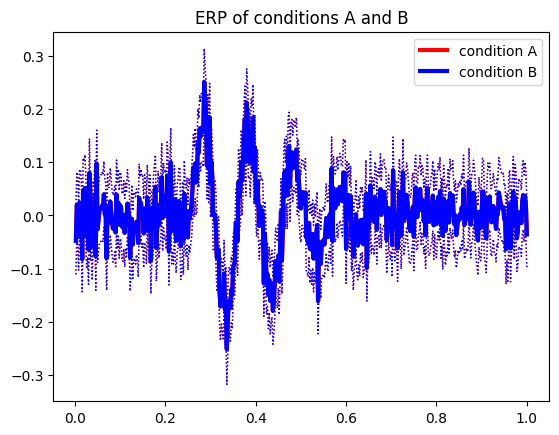

In [33]:
erpA = EEGa.mean(0)    # Compute the mean across trials (the ERP)
sdA  = EEGa.std(0)    # Compute the sd across trials 
sdmnA= sd / np.sqrt(ntrials)    # Compute the s.d.m.n

erpB = EEGa.mean(0)   # Compute the mean across trials (the ERP)
sdB  = EEGa.std(0)    # Compute the sd across trials 
sdmnB= sd / np.sqrt(ntrials)    # Compute the s.d.m.n

plt.plot(t, erpA, 'r', lw=3, label='condition A')  # Plot the ERP of condition A
plt.plot(t, erpA + 2 * sdmnA, 'r:', lw=1)           # ... and include the upper CI
plt.plot(t, erpA - 2 * sdmnA, 'r:', lw=1)           # ... and the lower CI

plt.plot(t, erpB, 'b', lw=3, label='condition B')  # Plot the ERP of condition B
plt.plot(t, erpB + 2 * sdmnB, 'b:', lw=1)           # ... and include the upper CI
plt.plot(t, erpB - 2 * sdmnB, 'b:', lw=1)           # ... and the lower CI

plt.title('ERP of conditions A and B')
plt.legend()
plt.show()

### A Bootstrap Test to Compare ERPs <a id="bootstrap"></a>

In [34]:
mnA = np.mean(EEGa,0)          # Determine ERP for condition A
mnB = np.mean(EEGb,0)          # Determine ERP for condition B
mnD = mnA - mnB                # Compute the differenced ERP
stat = np.max(np.abs(mnD))     # Compute the statistic
print('stat = {:.4f}'.format(stat))

stat = 0.2884


The biggest difference between the biggest lines

In [41]:
EEG = np.vstack((EEGa, EEGb))  # Step 1. Merge EEG data from all trials
np.random.seed(123)            # Fix seed for reproducibility

N_resample = 3000;
stat0 = np.zeros(N_resample)
for k in np.arange(0,N_resample):
    
    i      = np.random.randint(0, 2000, size = ntrials)    # Create resampled indices.
    EEG0   = EEG[i,:]   # Create a resampled EEG for "condition A".
    ERP0_A = EEG0.mean(0)   # Create a resampled ERP for "condition A".
    
    i      = np.random.randint(0, 2000, size=ntrials)    # Create resampled indice from 0 to 1000
    EEG0   = EEG[i,:]   # Create a resampled EEG for "condition B".
    ERP0_B = EEG0.mean(0)    # Create a resampled ERP for "condition B".
    
    MnD = ERP0_A - ERP0_B
    stat0[k] = np.max(np.abs(mnD)) # Compute the stat from the resampled ERPs

In [ ]:
# Plot the observed stat vs the resampled stat.
plt.figure()
plt.hist(stat0, bins='auto')
plt.vlines(stat, 0, 100)
np.size(np.where(stat0>stat)) / stat0.size